## Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn import under_sampling , over_sampling
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
# Load Data
data = pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Getting insights about the data

In [36]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### if we look at the data columns we will find that the data has one categorical column  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#### Lets plot this column using seaborn library , we will find that propose column have 7 values

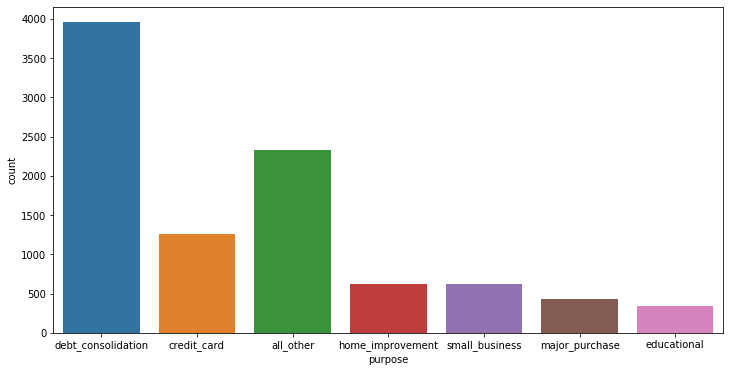

In [44]:
plt.figure(figsize=(12,6))
# sns.countplot(data=data, x='purpose')
sns.countplot(data=data , x='purpose')

In [41]:
data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

#### Second, to filter numerical features, we can use .corr() function to select only features with high correlation to the target variable 

In [5]:
data.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


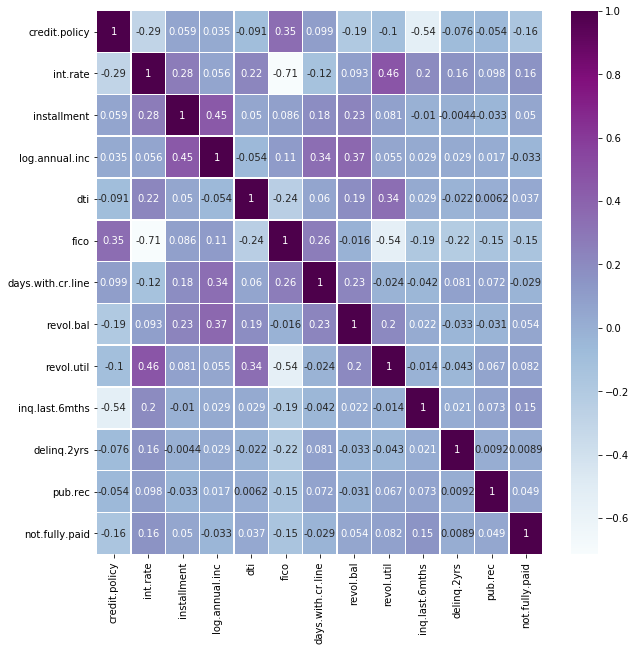

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr() ,cmap ='BuPu',cbar=True,annot=True,linewidths=.5)
plt.show()

#### Observation
    "revol,util" and "int.rate" in moderately correlated  
    "installment" and "log.annual" in moderately correlated  
    "delinq.2yrs" is not correlate to "not.fully.paid"

In [48]:
data.corr()['not.fully.paid'].sort_values(ascending = False)

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64

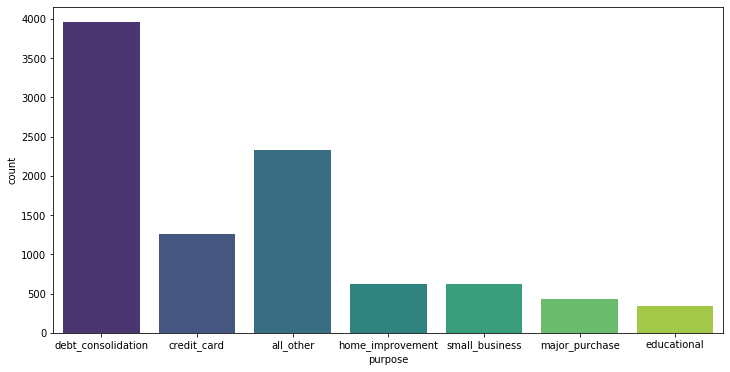

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', data=data, palette='viridis')

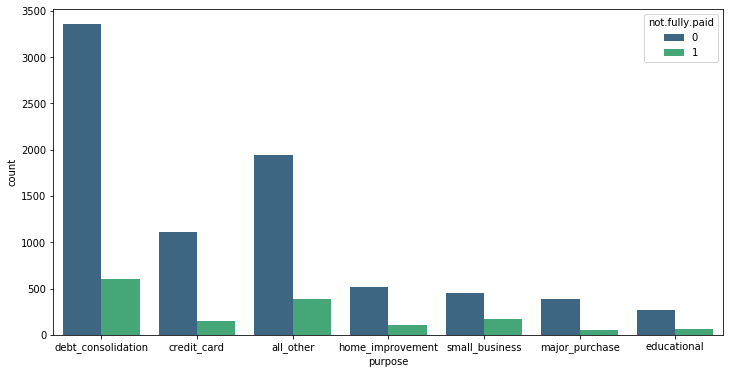

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', data=data, palette='viridis', hue='not.fully.paid')

#### Observation
    most loan purpose is "debt_consolidation"

Text(0.5, 1.0, 'int.rate Distribution')

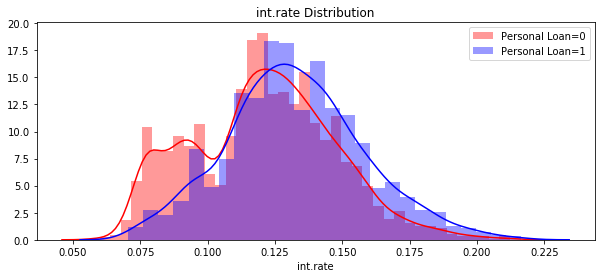

In [10]:
plt.figure(figsize=(10,4))
sns.distplot(data[data["not.fully.paid"] == 0]['int.rate'], color = 'r',label='Personal Loan=0')
sns.distplot(data[data["not.fully.paid"] == 1]['int.rate'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("int.rate Distribution")

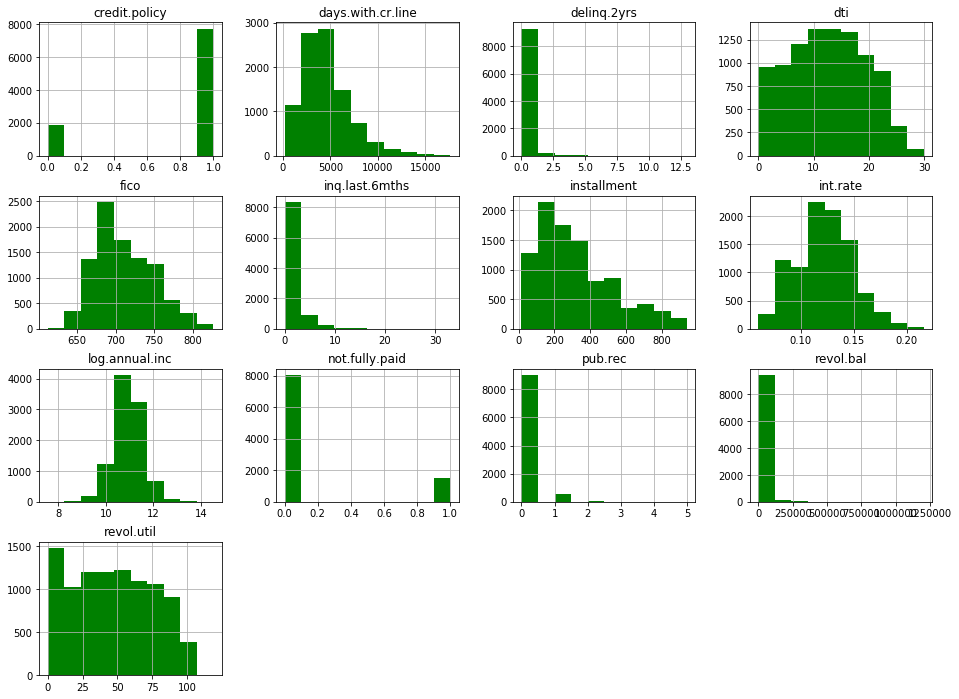

In [11]:
data.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()

#### Observation
    -'int.rate' column is normally distributed. Here can see that the mean and midean is almost same .
   



#### In this section, we will look at the structure of the datasets. Firstly, we will check the features present in our data and then we will look at their data types.

>  we have 13 independent variables and 1 target variable


In [12]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

#### in this section,  we will check if the data have null values 
> There are no null values

In [13]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

#### Print the data type of each variable , we can see there are 3 formats of data type : 

> - object: Object format means variables are categorical. Categorical variables in our dataset are: Purpose , The machine cannot deal with texts, so we will convert text columns to numbers using 'OneHotEncoder' or OrdinalEncoder


> - int64: It represents the integer variables .

>- float64: It represents the variable which have some decimal values involved. They are also numerical variables.



In [14]:
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

#### to get the number of unique values in data columns 


In [53]:
data['purpose'].nunique()

7

#### to get the five-number summary (mean , median , first second third  quatile ) + std , max , min , 
> it found that the data have different scales for instance "int.rate" max = .21 and "installment" max = 940 , Machine learning algorithms don't perform well when the input numerical attributes have very different scales , there are two common ways to get all attributes to have the same scale : min-maxScaling , Standardization .  
  
: to get more insights click the forward links :
- Arabic :- https://www.youtube.com/watch?v=4RmXXNxAves  
- English :- https://www.youtube.com/watch?v=mnKm3YP56PY

In [16]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [17]:
data['int.rate'].max()

0.2164

In [54]:
data['revol.bal'].max()

1207359

## Prepare the Data for Machine Learning Algorithms

#### in this section we will look at the target variable , it found that The data is imbalanced , An imbalanced data can result in inaccurate / biased classifications of the final output. Therefore, before fitting the data into the machine learning model, we need to rebalance the data
> there are 3 ways to handle imbalanced data 
-  under-sampling
-  over-sampling 
-  smote     
  
       Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class, a balanced new dataset can be retrieved for further modelling.

---

       On the contrary, oversampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. Rather than getting rid of abundant samples, new rare samples are generated by using e.g. repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique)

reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets  

Video : https://www.youtube.com/watch?v=JnlM4yLFNuo

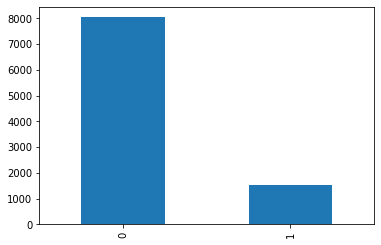

In [19]:
data['not.fully.paid'].value_counts().plot(kind= 'bar')

In [20]:
data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [21]:
numofzero  = 100 * (data['not.fully.paid'].value_counts()[0]/len(data))
numofone  = 100 * (data['not.fully.paid'].value_counts()[1]/len(data))

print(f' The percentage of zero = {numofzero}')
print(f' The percentage of one = {numofone}')

 The percentage of zero = 83.99457089162664
 The percentage of one = 16.005429108373356


## under-sampling

In [22]:
datacopy =data
no_frauds = len(datacopy[datacopy['not.fully.paid'] == 1])
non_fraud_indices = datacopy[datacopy["not.fully.paid"] == 0].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = datacopy[datacopy["not.fully.paid"] == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
final_under = datacopy.loc[under_sample_indices]
# X_under = under_sample.drop('not.fully.paid',axis = 1)
# y_under = under_sample['not.fully.paid']
print(len(final_under[final_under['not.fully.paid'] == 1]))
print(len(final_under[final_under['not.fully.paid'] == 0]))


1533
1533


In [65]:
newcopy = data
rus = RandomUnderSampler()
xdata = newcopy.drop('not.fully.paid',axis = 1)
ydata = newcopy['not.fully.paid']


x_rus , y_rus =rus.fit_resample(xdata , ydata)



#### (2) Handling Categorical attributes

In [23]:
data_lab = final_under['not.fully.paid']
data_lab

6       1
7       1
57      1
65      1
73      1
       ..
4239    0
2808    0
6893    0
4249    0
4593    0
Name: not.fully.paid, Length: 3066, dtype: int64

In [66]:
data_num = final_under.drop(['delinq.2yrs','purpose','not.fully.paid'],axis=1)
data_num

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,pub.rec
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,1
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0
57,1,0.1343,678.08,11.884489,10.15,682,4209.958333,41674,74.1,0,0
65,1,0.1059,32.55,10.433822,14.47,687,1110.000000,4485,36.9,1,0
73,1,0.1501,225.37,12.269047,6.45,677,6240.000000,56411,75.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4239,1,0.0859,395.13,11.820381,5.87,772,4080.000000,5068,16.6,3,0
2808,1,0.1189,414.55,11.002100,14.68,737,4230.000000,12663,34.4,1,0
6893,1,0.1322,202.81,10.491274,2.33,722,1590.041667,377,47.1,0,0
4249,1,0.1287,336.34,11.512925,15.67,692,4380.000000,32268,73.0,3,0


In [67]:
data_cat = final_under[['purpose']]
data_cat.head(10)

,purpose
6,debt_consolidation
7,all_other
57,credit_card
65,all_other
73,small_business
74,home_improvement
75,home_improvement
76,debt_consolidation
89,small_business
90,small_business


#### as we mentioned in previous section , machine learning algorithm cannot handle textual data , we can solve this problem using (1) One Hot Encoder (2) OrdinalEncoder  to transform categorical column "Purpose" to numerical column

1. OrdinalEncoder :  
             
       In ordinal encoding, each unique category value is assigned an integer value.

       For example, “red” is 1, “green” is 2, and “blue” is 3.

       This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used.

       For some variables, an ordinal encoding may be enough. The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.

       It is a natural encoding for ordinal variables. For categorical variables, it imposes an ordinal relationship where no such relationship may exist. This can cause problems and a one-hot encoding may be used instead
2. OneHotEncoder:  

       For categorical variables where no ordinal relationship exists, the integer encoding may not be enough, at best, or misleading to the model at worst.

       Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

       In this case, a one-hot encoding can be applied to the ordinal representation. This is where the integer encoded variable is removed and one new binary variable is added for each unique integer value in the variable

Refernce : https://machinelearningmastery.com/one-hot-encoding-for-categorical-data  

Video : https://www.youtube.com/watch?v=6WDFfaYtN6s

In [26]:
cat_encoder = OneHotEncoder()
data_cat_hot = cat_encoder.fit_transform(data_cat)
data_cat_hot

<3066x7 sparse matrix of type '<class 'numpy.float64'>'
	with 3066 stored elements in Compressed Sparse Row format>

In [27]:
data_cat_hot.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

### (3) Transformation Pipelines 
    to handle data transformation steps that need to be executed in right order , fortunately Scikit-Learn provides the Pipeline class to help with such sequences of transformations , here is a small pipeline for the numerical attributes : 

    as we mentioned before the data have different scaling thus we must use Standard scaling or Min-max Scaling in this section we will use Standard , it shift and rescale the data so that they end up ranging from -1 to 1 , Some machine learning algorithms cannot handle negative variables thus we can not use standard 

Refernce : Hands on Machine Learning With Scikit-learn Book   

Pipeline Video : https://www.youtube.com/watch?v=w9IGkBfOoic    
 
  
Standardization Videos :
- Arabic :- https://www.youtube.com/watch?v=4RmXXNxAves  

- English :- https://www.youtube.com/watch?v=mnKm3YP56PY

In [68]:
num_pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])
data_num_tr = num_pipeline.fit_transform(data_num)
data_num_tr

array([[ 0.57308191,  0.85612088, -0.64294829, ...,  0.96280795,
        -0.72389622,  3.14423606],
       [ 0.57308191, -0.59051018, -0.93710288, ...,  0.68110157,
        -0.72389622, -0.27914027],
       [ 0.57308191,  0.27671106,  1.62438399, ...,  0.87005097,
        -0.72389622, -0.27914027],
       ...,
       [ 0.57308191,  0.19718422, -0.60177602, ..., -0.05751881,
        -0.72389622, -0.27914027],
       [ 0.57308191,  0.06463949,  0.02367719, ...,  0.83226109,
         0.44321989, -0.27914027],
       [ 0.57308191, -0.32920771, -0.31010395, ...,  1.34070675,
         0.05418119, -0.27914027]])

#### ColumnTransformer , 
    We have handled the categorical columns and the numerical columns separately , it would be more convenient to have a single transformer able to habdle all columns , Scikit-Learn introduced ColumnTransformer for this purpose 

In [29]:
num_attrs = list(data_num)
cat_attrs = ['purpose']

fullpipeline = ColumnTransformer([
    ('num',num_pipeline,num_attrs),
    ('cat',OneHotEncoder(),cat_attrs)
])


In [30]:
data_prepared = fullpipeline.fit_transform(final_under)
data_prepared

array([[ 0.57308191,  0.85612088, -0.64294829, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57308191, -0.59051018, -0.93710288, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57308191,  0.27671106,  1.62438399, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.57308191,  0.19718422, -0.60177602, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57308191,  0.06463949,  0.02367719, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.57308191, -0.32920771, -0.31010395, ...,  0.        ,
         0.        ,  0.        ]])

## The model using Undersampling  


### Split the data :
> The only way to know how well a model will generalize to new cases is to actually try it out on new cases , A better option is to split your data into two sets : the training set and test set , you train your model using the train set , and you test it using the test set .  
Scikit learn provides "train test split" fuction to split the dataset into multiple subsets in various ways

    its common to use 80% of the data for training and hold out 20% for testing , however this depends on the size of the datasets .
    
Refernce : Hands on Machine Learning With Scikit-learn Book   
Video : https://www.youtube.com/watch?v=fwY9Qv96DJY

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data_prepared,data_lab,test_size = 0.2, random_state = 0)

### Select and Train a Model
    in this section , we will train 3 models  
    - LogisticRegression  
    - KNeighborsClassifier(knn)  
    - RandomForestClassifier  
LogisticRegression : https://www.youtube.com/watch?v=zM4VZR0px8E  

KNN : https://www.youtube.com/watch?v=HVXime0nQeI  

RandomForestClassifier : https://www.youtube.com/watch?v=J4Wdy0Wc_xQ

In [32]:

models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "RF": RandomForestClassifier(n_estimators=150, max_depth=10),
    "XGB": XGBClassifier(),
}

for name,model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('-'*30)


Training Model LR 
--------------
Training Accuracy: 0.6215334420880914
Testing Accuracy: 0.6140065146579805
Testing Confusion Matrix: 
[[181  99]
 [138 196]]
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.6908646003262643
Testing Accuracy: 0.5765472312703583
Testing Confusion Matrix: 
[[169 111]
 [149 185]]
------------------------------
Training Model RF 
--------------
Training Accuracy: 0.9033442088091354
Testing Accuracy: 0.6237785016286646
Testing Confusion Matrix: 
[[189  91]
 [140 194]]
------------------------------
Training Model XGB 
--------------
[15:03:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ahmed\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuracy: 0.9971451876019576
Testing Accuracy: 0.6091205211726385
Testing Confusion Matrix: 
[[172 108]
 [132 202]]
------------------------------


## The model using Oversampling - Smote  


In [72]:
from imblearn.over_sampling import SMOTE

mydata = pd.get_dummies(data, columns=['purpose'], drop_first=True)
ros = SMOTE(sampling_strategy=1)
x_over = mydata.drop(['not.fully.paid'],axis =1)
y_over = mydata['not.fully.paid']


x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(x_over, y_over, test_size = 0.2, random_state=22)

x_over_train , y_over_train = ros.fit_resample(x_over_train,y_over_train)
x_over_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.175800,718.840000,11.522915,16.930000,667,3659.958333,18606,67.500000,0,1,0,0,0,0,0,0,0
1,1,0.114800,454.970000,10.673596,23.610000,752,8679.958333,6698,67.000000,0,0,0,0,1,0,0,0,0
2,1,0.109500,170.120000,11.302204,10.340000,692,8948.000000,25972,89.600000,1,0,0,0,0,0,0,0,0
3,1,0.118300,397.610000,10.474467,5.690000,722,5010.000000,14406,67.600000,1,0,0,0,1,0,0,0,0
4,1,0.093200,159.740000,10.714418,20.350000,737,1950.000000,4717,51.300000,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12923,0,0.149020,161.376007,10.451136,11.318096,665,3242.110344,2291,56.286377,3,0,0,0,0,0,0,0,0
12924,1,0.088655,243.100887,11.055377,8.721245,762,8096.600194,4197,13.410422,0,0,0,0,0,0,0,0,0
12925,1,0.139108,695.857577,11.502065,12.386411,696,6519.821892,30064,91.627473,0,0,1,0,1,0,0,0,0
12926,0,0.176849,570.366075,11.587502,2.566395,730,7720.331889,5055,12.703396,8,0,0,0,0,0,0,0,0


In [73]:
scaler = StandardScaler()
scaler.fit(x_over_train)
x_over_train = scaler.transform(x_over_train)
x_over_test = scaler.transform(x_over_test)
x_over_train

array([[ 0.6939376 ,  1.95085841,  1.95350885, ..., -0.20979026,
        -0.1692459 , -0.21770458],
       [ 0.6939376 , -0.46567875,  0.63862133, ..., -0.20979026,
        -0.1692459 , -0.21770458],
       [ 0.6939376 , -0.67564017, -0.78081138, ..., -0.20979026,
        -0.1692459 , -0.21770458],
       ...,
       [ 0.6939376 ,  0.49730887,  1.83898541, ..., -0.20979026,
        -0.1692459 , -0.21770458],
       [-1.44105176,  1.99241523,  1.21365017, ..., -0.20979026,
        -0.1692459 , -0.21770458],
       [-1.44105176, -0.67670905, -0.40569225, ..., -0.20979026,
        -0.1692459 , -0.21770458]])

In [35]:
for name,model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_over_train,y_over_train)
    y_pred = model.predict(x_over_test)
    print(f'Training Accuracy: {accuracy_score(y_over_train, model.predict(x_over_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_over_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_over_test, y_pred)}')
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.763381806930693
Testing Accuracy: 0.6993736951983298
Testing Confusion Matrix: 
[[1212  369]
 [ 207  128]]
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.840887995049505
Testing Accuracy: 0.6722338204592901
Testing Confusion Matrix: 
[[1158  423]
 [ 205  130]]
------------------------------
Training Model RF 
--------------
Training Accuracy: 0.8435179455445545
Testing Accuracy: 0.7301670146137788
Testing Confusion Matrix: 
[[1278  303]
 [ 214  121]]
------------------------------
Training Model XGB 
--------------
[15:03:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ahmed\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuracy: 0.9610148514851485
Testing Accuracy: 0.7682672233820459
Testing Confusion Matrix: 
[[1402  179]
 [ 265   70]]
------------------------------


In [55]:
from imblearn.under_sampling import RandomUnderSampler
